# Objective: 

1. Prime goal : identify reasons for customer default
                default: Any customer who is not paying the bill continously for 3 months
                
2. what are distinguish characterstics of default and non default customers
3. what are factors which are influcing the defaulter

Future: based on histroical data, can we predict who is going to become the defaulter?

scope: to mitigate the risk and save the amount and make the decision for financial plannings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from scipy import stats
import os
import warnings

In [83]:
loan=pd.read_csv(r"C:\ksr\data science\DS_batch1\Practical_dataset\Give me some Credit\cs-training.csv")

# Basic sanity/quality check

In [4]:
loan.shape

(150000, 12)

In [5]:
loan.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

# renaming the column names

In [7]:
loan.rename(columns={'SeriousDlqin2yrs':"default","RevolvingUtilizationOfUnsecuredLines":"revol_pct",
                    'NumberOfTime30-59DaysPastDueNotWorse':"no_30_59_def",
                    'NumberOfOpenCreditLinesAndLoans':"cnt_open_loans",
                    'NumberOfTimes90DaysLate':"no_of_90_late",
                    'NumberRealEstateLoansOrLines':"cnt_real_esate_loans",
                    'NumberOfTime60-89DaysPastDueNotWorse':"no_60_89_def",
                    'NumberOfDependents':"depdents"},inplace=True)

In [8]:
loan.head(2)

,Sr_No,default,revol_pct,age,no_30_59_def,DebtRatio,MonthlyIncome,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sr_No                 150000 non-null  int64  
 1   default               150000 non-null  int64  
 2   revol_pct             150000 non-null  float64
 3   age                   150000 non-null  int64  
 4   no_30_59_def          150000 non-null  int64  
 5   DebtRatio             150000 non-null  float64
 6   MonthlyIncome         120269 non-null  float64
 7   cnt_open_loans        150000 non-null  int64  
 8   no_of_90_late         150000 non-null  int64  
 9   cnt_real_esate_loans  150000 non-null  int64  
 10  no_60_89_def          150000 non-null  int64  
 11  depdents              146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


# memory optimization

In [10]:
""" iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
"""
df=loan.copy()
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in df.columns:
    col_type = df[col].dtype

    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')

end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))   

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sr_No                 150000 non-null  int32  
 1   default               150000 non-null  int8   
 2   revol_pct             150000 non-null  float16
 3   age                   150000 non-null  int8   
 4   no_30_59_def          150000 non-null  int8   
 5   DebtRatio             150000 non-null  float32
 6   MonthlyIncome         120269 non-null  float32
 7   cnt_open_loans        150000 non-null  int8   
 8   no_of_90_late         150000 non-null  int8   
 9   cnt_real_esate_loans  150000 non-null  int8   
 10  no_60_89_def          150000 non-null  int8   
 11  depdents              146076 non-null  float16
dtypes: float16(2), float32(2), int32(1), int8(7)
memory usage: 3.3 MB


# changing the type of attributes based its nature

In [39]:
loan["no_30_59_def"]=loan["no_30_59_def"].astype("category")
loan["cnt_open_loans"]=loan["cnt_open_loans"].astype("category")
loan["cnt_real_esate_loans"]=loan["cnt_real_esate_loans"].astype("category")
loan["no_60_89_def"]=loan["no_60_89_def"].astype("category")
loan["no_of_90_late"]=loan["no_of_90_late"].astype("category")
loan["depdents"]=loan["depdents"].astype("category")

In [40]:
loan.dtypes

Sr_No                      int64
default                    int64
revol_pct                float64
age                        int64
no_30_59_def            category
DebtRatio                float64
MonthlyIncome            float64
cnt_open_loans          category
no_of_90_late           category
cnt_real_esate_loans    category
no_60_89_def            category
depdents                category
dtype: object

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Sr_No                 150000 non-null  int64   
 1   default               150000 non-null  int64   
 2   revol_pct             150000 non-null  float64 
 3   age                   150000 non-null  int64   
 4   no_30_59_def          150000 non-null  category
 5   DebtRatio             150000 non-null  float64 
 6   MonthlyIncome         120269 non-null  float64 
 7   cnt_open_loans        150000 non-null  category
 8   no_of_90_late         150000 non-null  category
 9   cnt_real_esate_loans  150000 non-null  category
 10  no_60_89_def          150000 non-null  category
 11  depdents              146076 non-null  category
dtypes: category(6), float64(3), int64(3)
memory usage: 7.7 MB


In [47]:
path=r"C:\Users\Koti\Documents\Data_Science\DS_FEB_2020\codes\standard_code\userdefined_functions"

In [48]:
os.chdir(path)

# Summary statstics for numerical variable

In [49]:
from summary_stats import summary_stat

In [50]:
summary_stat(loan)

,count,min,5%,25%,50%,mean,75%,90%,95%,99.7%,max,std
Sr_No,150000.0,1.0,7500.950000,37500.750000,75000.500000,75000.500000,112500.250000,135000.100000,142500.05,149550.003000,150000.0,43301.414527
default,150000.0,0.0,0.000000,0.000000,0.000000,0.066840,0.000000,0.000000,1.00,1.000000,1.0,0.249746
revol_pct,150000.0,0.0,0.000000,0.029867,0.154181,6.048438,0.559046,0.981278,1.00,1.760802,50708.0,249.755371
age,150000.0,0.0,29.000000,41.000000,52.000000,52.295207,63.000000,72.000000,78.00,91.000000,109.0,14.771866
DebtRatio,150000.0,0.0,0.004329,0.175074,0.366508,353.005076,0.868254,1267.000000,2449.00,7300.006000,329664.0,2037.818523
MonthlyIncome,120269.0,0.0,1300.000000,3400.000000,5400.000000,6670.221237,8249.000000,11666.000000,14587.60,45000.000000,3008750.0,14384.674215


# Summary statstics for categorical variables

In [51]:
from categorical_summary import char_summary

In [54]:
abc=char_summary(loan)

UnboundLocalError: local variable 'table' referenced before assignment

In [55]:
import researchpy as rp
def char_summary(data1):
    data2=data1.select_dtypes(include="category")
    ab=rp.summary_cat(data2)
    return ab

In [57]:
ab=char_summary(data1=loan)

In [58]:
type(ab)

pandas.core.frame.DataFrame

In [60]:
ab

,Variable,Outcome,Count,Percent
0,no_30_59_def,0.0,126018,84.01
1,,1.0,16033,10.69
2,,2.0,4598,3.07
3,,3.0,1754,1.17
4,,4.0,747,0.50
...,...,...,...,...
142,,8.0,24,0.02
143,,10.0,5,0.00
144,,9.0,5,0.00
145,,20.0,1,0.00


In [61]:
loan.head()

,Sr_No,default,revol_pct,age,no_30_59_def,DebtRatio,MonthlyIncome,cnt_open_loans,no_of_90_late,cnt_real_esate_loans,no_60_89_def,depdents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


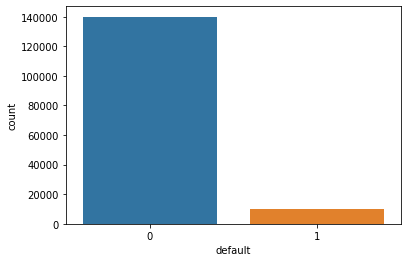

In [62]:
sns.countplot(loan["default"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

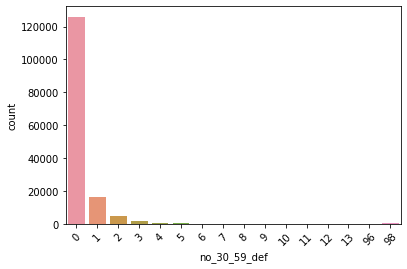

In [64]:
sns.countplot(loan["no_30_59_def"])
plt.xticks(rotation=45)

In [67]:
df1=loan[["no_30_59_def","default","cnt_open_loans"]]

In [68]:
df1.head()

,no_30_59_def,default,cnt_open_loans
0,2,1,13
1,0,0,4
2,1,0,2
3,0,0,5
4,1,0,7


In [69]:
col=list(df1.columns)

In [70]:
col

['no_30_59_def', 'default', 'cnt_open_loans']

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


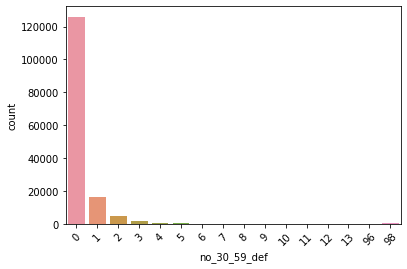

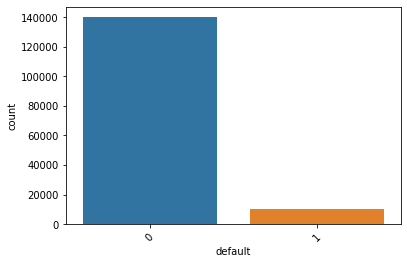

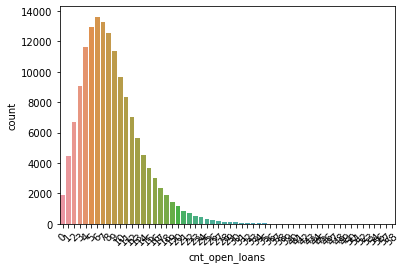

In [80]:
for i in col:
    plt.figure(i)
    abc=sns.countplot(df[i])
    plt.xticks(rotation=45)
    print(abc)

In [81]:
from pycaret.classification import *

In [86]:
exp_clf=setup(data=loan,target="SeriousDlqin2yrs",polynomial_features=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7357
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(150000, 12)"
4,Missing Values,True
5,Numeric Features,7
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [91]:
tra

TypeError: index() takes at least 1 argument (0 given)

In [92]:
loan

,Sr_No,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
